<a href="https://colab.research.google.com/github/BraianMendes/AME-Hackaton/blob/master/AME_DATA_An%C3%A1lises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/1nf2h8U.png)


# Índice

0)Importando as bibliotecas

1) Data Set e analises  

2) Visualização dos dados

3) Analise descritiva dos dados

4) Analise de clusters usando K-Means

5) Analise de Cluster (K-Means) do gênero masculino

6) Analise de Cluster (K-Means) do gênero feminino

7) Programa final

#0)Importando as bibliotecas

In [ ]:
#Para os bancos de dados
import numpy as np
import pandas as pd
#Para as visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
#Para trabalharmos com os cluster
from sklearn.cluster import KMeans
import warnings
import os

In [ ]:
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

#1) Data Set e analises  

##Sobre o banco de dados

*   Neste Dataset encontramos o comportamento de consumo de clientes em um determinado shopping nos EUA. Você pode encontra-lo neste [site](https://www.kaggle.com/akram24/mall-customers).
*   Como podemos notar este banco de dados é totalmente fictício e será utilizado para fins de demontração do nosso app.

##Dicionário dos dados


1.   ID = Identificação dos clientes;
2.   SEXO = Gênero dos clientes; 
3.   IDADE = Idade dos clientes;
4.   RENDA ANUAL = Renda anual dos clientes em milhares de dolares;
5.   SCORE (1-100) = Pontuação gerada pelo consumo destes clientes.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/017mori/ML_Jackie_and_me/master/Mall_Customers.csv')
df.columns = ["ID", "Sexo", "Idade", "Renda_Anual", "Score_(1-100)"]
df.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Tamanho do banco de dados
df.shape

(200, 5)

#Análise do banco de dados


In [ ]:
# Tipo das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             200 non-null    int64 
 1   Sexo           200 non-null    object
 2   Idade          200 non-null    int64 
 3   Renda_Anual    200 non-null    int64 
 4   Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Verificando se existe algum campo com valores faltantes
df.isnull().sum()

ID               0
Sexo             0
Idade            0
Renda_Anual      0
Score_(1-100)    0
dtype: int64

#2) Visualização dos dados

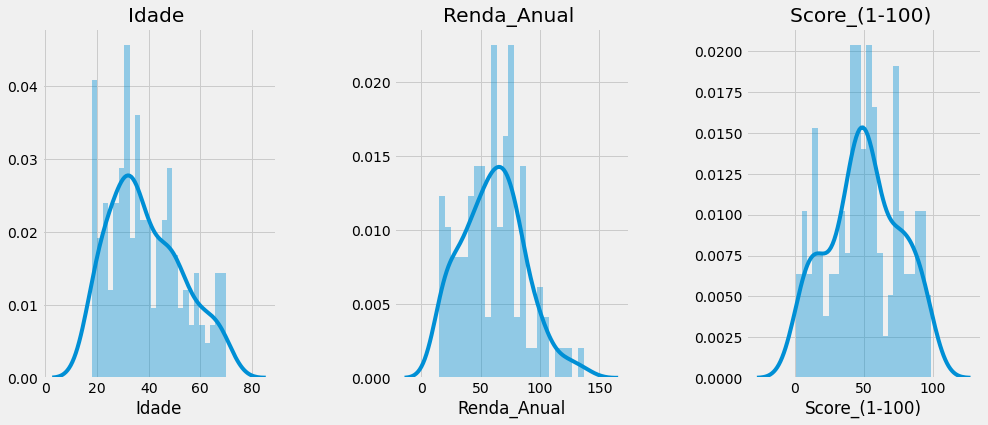

In [ ]:
#Histogramas das principais variaveis
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Idade' , 'Renda_Anual' , 'Score_(1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

>> No gráfico acima temos os histogramas para representar os dados quantitativos para que possa ser observado o ponto central, a variação da distribuição, além, da amplitude e simetria da distribuição dos mesmos.

###Comparativo da quantidade de clientes mulheres e homens

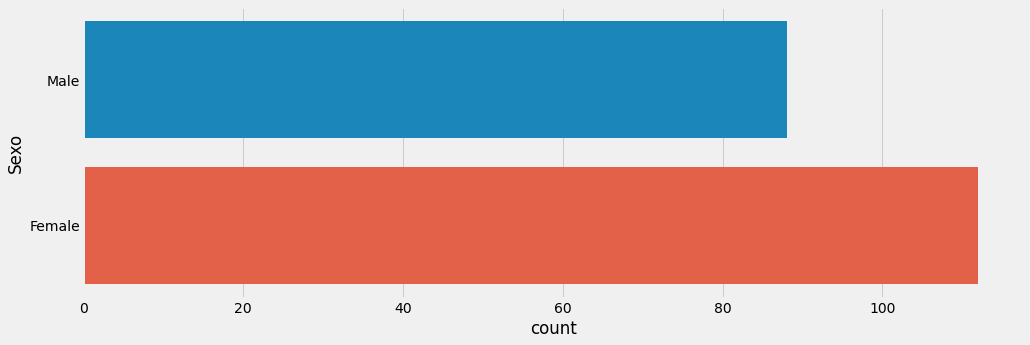

In [ ]:
#Comparação da quantidade de homens e mulheres
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Sexo' , data = df)
plt.show()

Com a base de dados organizada é possível realizar diversos estudos por meio dos gráficos. Como a base de dados é composta por dois grupos distintos (Homens e Mulheres) podemos plotar gráficos de barras para verificar os valores que cada grupo representa no total da base.

###Gráficos de disperção entre as variaveis

*   Aqui podemos analisar a disperção dos dados entre todas as variaveis duas á duas e diferenciadas por sexo. A ideia central é verificar a o quanto uma variável é afetada pela outra, ou seja, se elas possuem relação ou são independentes.
---



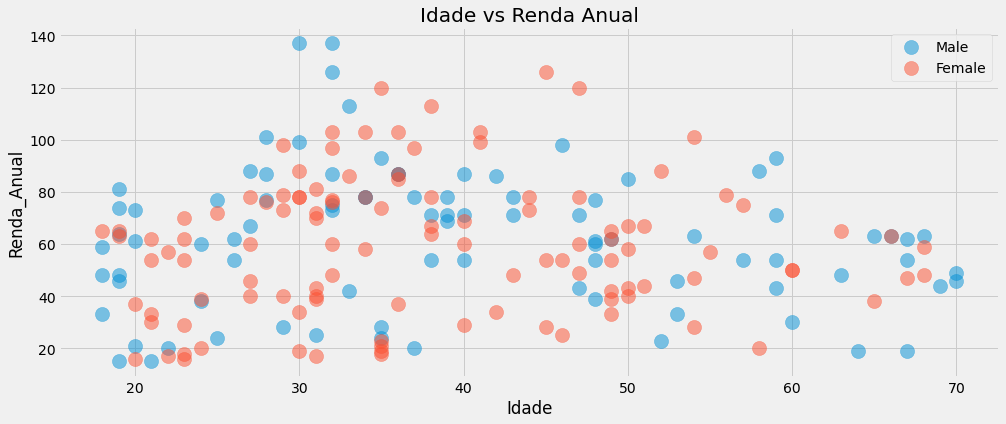

In [ ]:
# Gráfico de disperção entre Idade vs Renda Anual:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Idade' , y = 'Renda_Anual' , data = df[df['Sexo'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Idade'), plt.ylabel('Renda_Anual') 
plt.title('Idade vs Renda Anual')
plt.legend()
plt.show()

>> No gráfico acima, IDADE vs RENDA ANUAL, podemos observar que a relação entre as dua variáveis é nula, pois as distribuição dos dados no gráfico é visualmente aleatória.

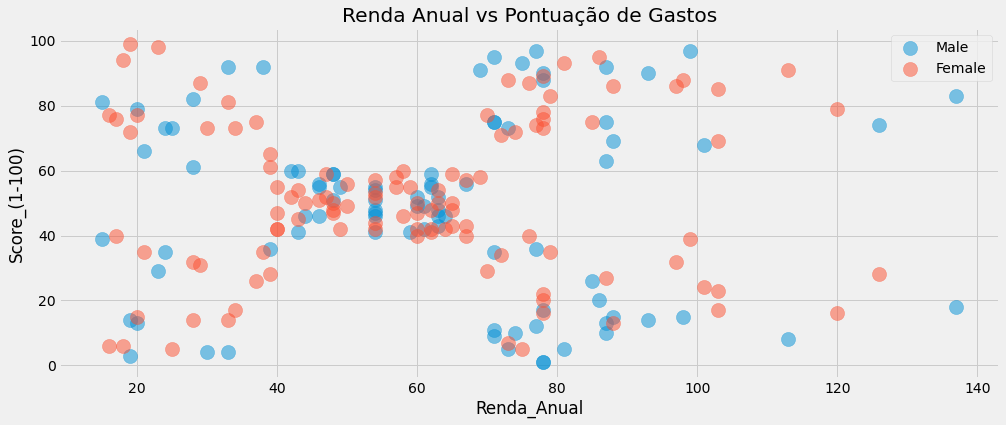

In [ ]:
#Gráfico de disperção entre Renda Anual vs Pontuação de Gastos:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Renda_Anual',y = 'Score_(1-100)' ,
                data = df[df['Sexo'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Renda_Anual'), plt.ylabel('Score_(1-100)') 
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend()
plt.show()

> > No gráfico acima, RENDA ANUAL vs PONTUAÇÃO DE GASTOS, podemos observar que existe uma relação nitida entre as dua variaveis, pois as distribuição dos dados no gráfico tem uma aparencia de X e com concentração de dados na faixa compreendidade entre os valores de 40 - 65 no eixo da variável Renda_Anual e 40 - 60 no eixo da variável Score_(1-100).





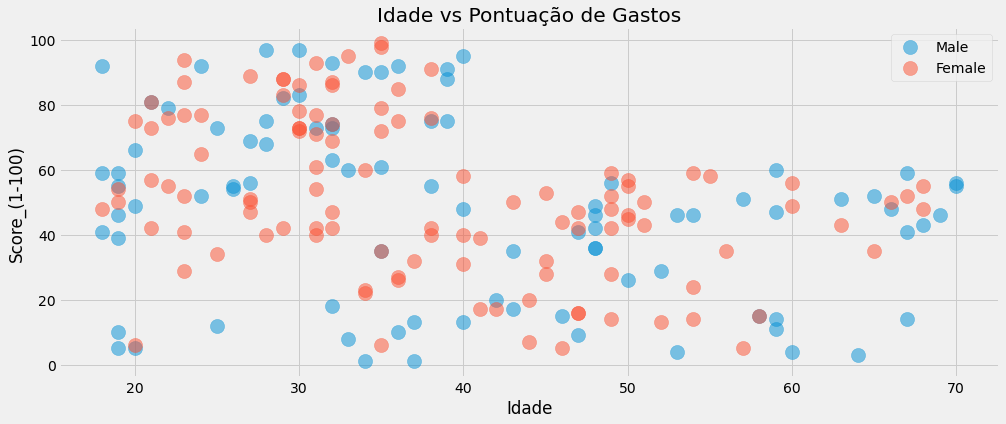

In [ ]:
#Gráfico de disperção entre Idade vs Pontuação de Gastos:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Idade' , y = 'Score_(1-100)'  , data = df[df['Sexo'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Idade'), plt.ylabel('Score_(1-100)' ) 
plt.title('Idade vs Pontuação de Gastos')
plt.legend()
plt.show()

No gráfico acima, Score_(1-100) vs Idade, podemos observar que a relação entre as dua variáveis é nula, pois as distribuição dos dados no gráfico é visualmente aleatória.

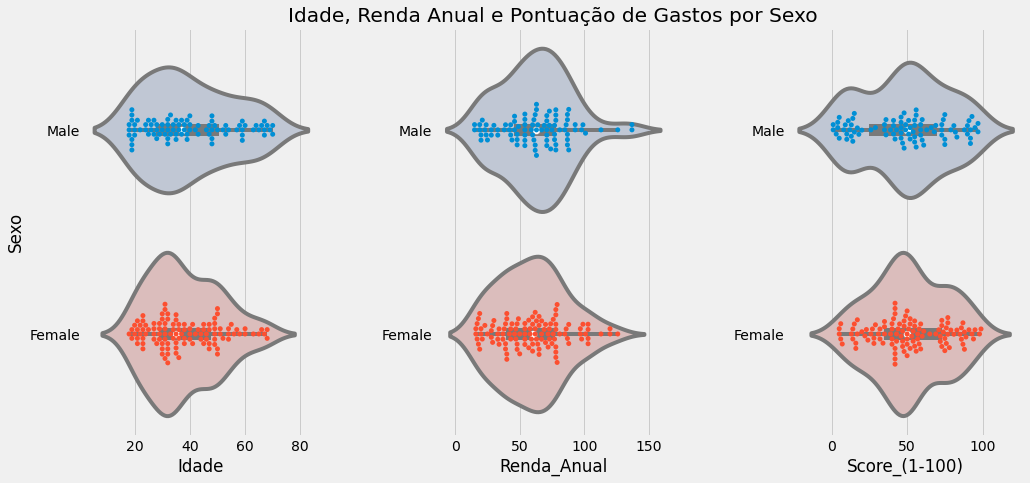

In [ ]:
#Subplots das variaveis por sexo 
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Idade' , 'Renda_Anual' , 'Score_(1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Sexo' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Sexo' , data = df)
    plt.ylabel('Sexo' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show()

>> No gráfico acima do Subplots das variáveis separadas por sexo, é possível observar que possuem comportamente similar mesmo assim podemos observar que eles se comportam da mesma maneira.

#3) Analise descritiva dos dados

In [ ]:
#Principais medidas das variaveis 
df.describe()

,ID,Idade,Renda_Anual,Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Matriz de correlação



In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,Idade,Renda_Anual,Score_(1-100)
ID,1.00,-0.03,0.98,0.01
Idade,-0.03,1.00,-0.01,-0.33
Renda_Anual,0.98,-0.01,1.00,0.01
Score_(1-100),0.01,-0.33,0.01,1.00


>> Como podemos observar, não existe correlações altas entre as variáveis. Logo, assumindo que elas são independentes, então podemos prosseguir com a analise de não supervisionada de Machine Liarning. 

#Analise de clusters usando K-Means

*   O algoritimo K-means realiza uma analise de similaridades das distancias dos dados, onde os coloca em grupos heterogeneos mas cada grupo é homogeneo intermente;
*   Esta é uma tecnica de ML não-supervisionada, podendo assim ser acressentada mais dados e funcionar livremente.


---

##Agora, vamos selecionar o nº de cluster através do método Elobow(Soma das distancias quadratícas intra Clusters)


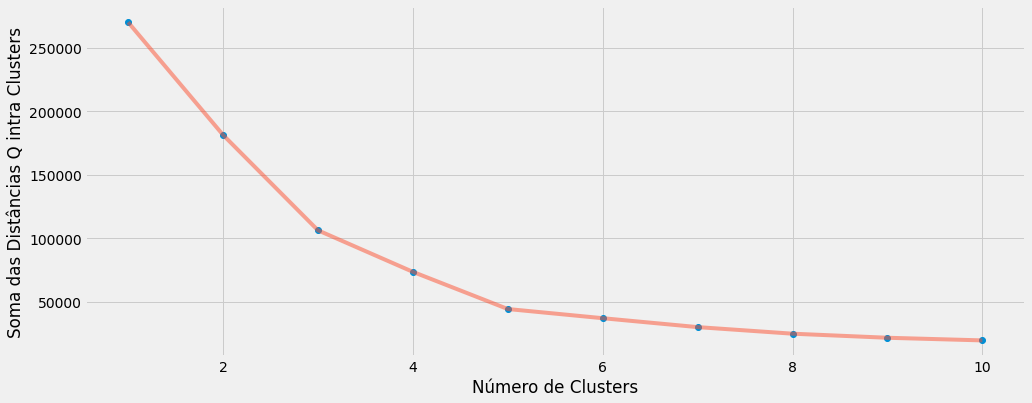

In [ ]:
X2 = df[['Renda_Anual' , 'Score_(1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

>> Assumimos que o nosso nº de Clusters ideal é igual a 5.

In [ ]:
algorithm = (KMeans(n_clusters = 5))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

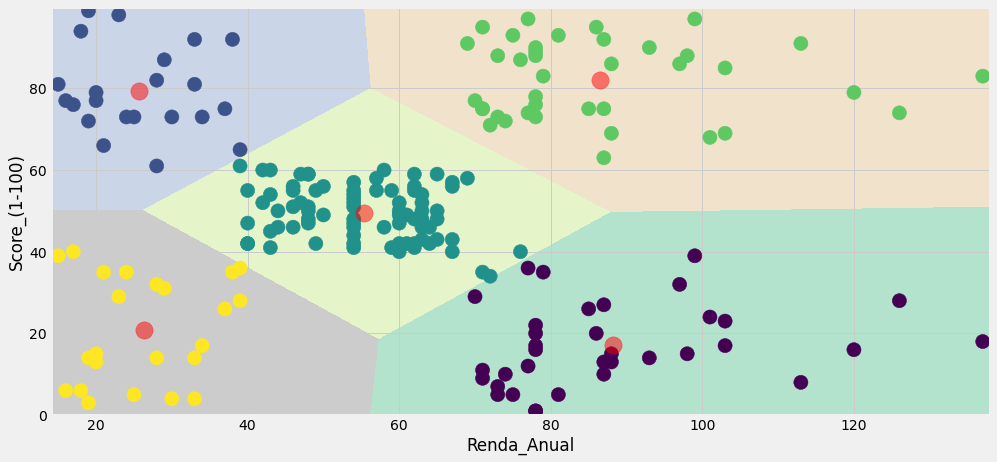

In [ ]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Renda_Anual' ,y = 'Score_(1-100)' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Score_(1-100)') , plt.xlabel('Renda_Anual')
plt.show()

>> Seguindo a separação a cima, temos
*   Região 4 de cima á direita;
*   Região 3 de cima á esquerda;
*   Região 2 de baixo á esquerda;
*   Região 1 do centro;
*   Região 0 de baixo á direita.

>>Logo, podemos perceber que: 
*   O cluster 4 tem um gasto alto, porém tem uma renda anaul alta;
*   O cluster 3 tem um gasto alto, porém tem uma renda anaul baixa; 
*   O cluster 2 tem um gasto baixo, porém tem uma renda anaul baixa;
*   O cluster 1 tem um gasto mediano, porém tem uma renda anaul mediana;
*   O cluster 0 tem um gasto baixo, porém tem uma renda anaul alta.

 

###Vamos criar uma coluna no nosso Data Set para diferenciar cada observação tipo de cluster






In [ ]:
df["clusters"] = algorithm.labels_
df.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


>> Agora é possivel identificar o cluster de cada pessoa

###Analise descritiva do BD por Cluster

In [ ]:
df_grupo = df.drop(["ID", "Idade"], axis = 1).groupby("clusters")
df_grupo.describe()

Renda_Anual                              ... Score_(1-100)                   
               count       mean        std   min  ...           25%   50%    75%   max
clusters                                          ...                                 
0               35.0  88.200000  16.399067  70.0  ...          10.0  16.0  23.50  39.0
1               22.0  25.727273   7.566731  15.0  ...          73.0  77.0  85.75  99.0
2               81.0  55.296296   8.988109  39.0  ...          44.0  50.0  55.00  61.0
3               39.0  86.538462  16.312485  69.0  ...          74.5  83.0  90.00  97.0
4               23.0  26.304348   7.893811  15.0  ...           9.5  17.0  33.50  40.0

[5 rows x 16 columns]

>>Logo, podemos observar as medidas mais importantes de cada Cluster entre as variaveis Renda Anual e Pontuação de gastos.

#5)Analise de Cluster (K-Means) do gênero masculino

In [ ]:
#Banco de dados dos clientes homens
df_masc = df.loc[df["Sexo"]== "Male"] 
df_masc.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
14,15,Male,37,20,13,4


In [ ]:
print(df_masc.shape)

(88, 6)


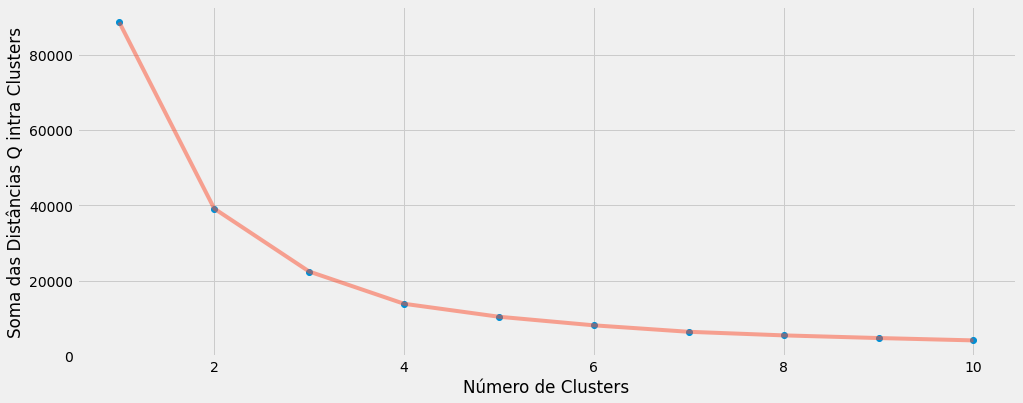

In [ ]:
X3 = df_masc[['Score_(1-100)' , 'Idade']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()


>> Assumimos que o nosso nº de Clusters ideal é igual a 3

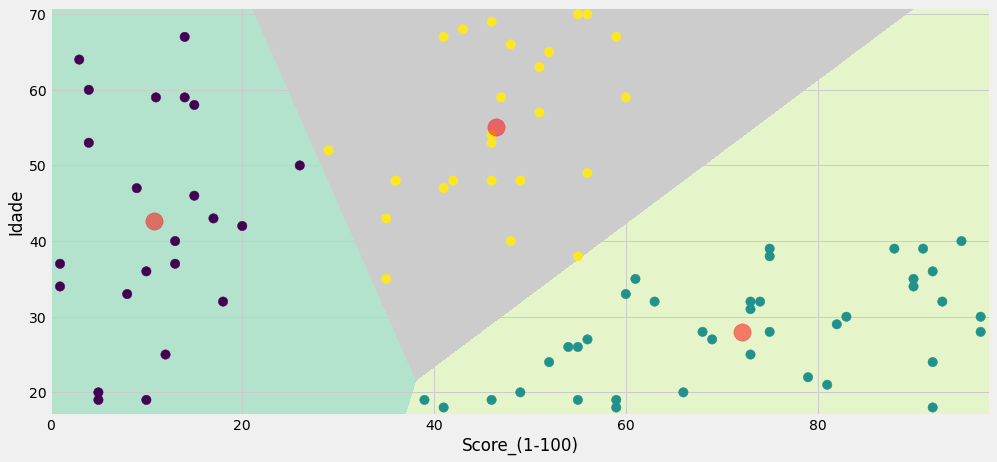

In [ ]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X3)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Score_(1-100)' ,y = 'Idade' , data = df_masc , c = labels2 , s = 88 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Idade') , plt.xlabel('Score_(1-100)')
plt.show()

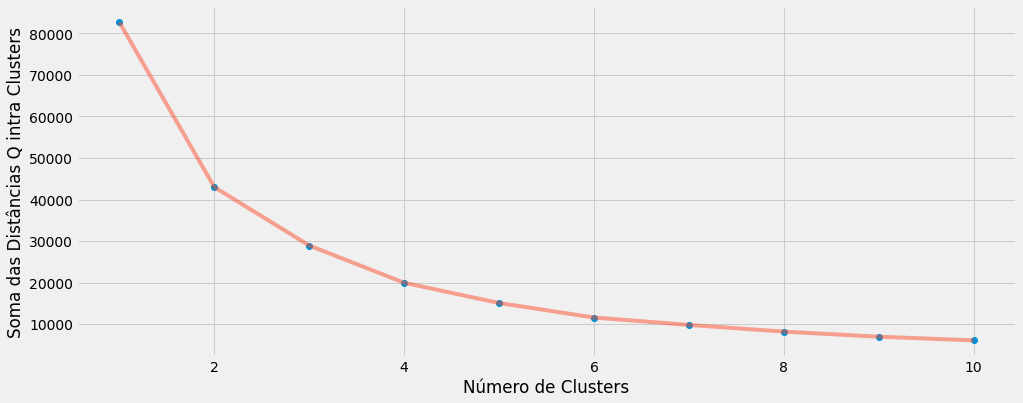

In [ ]:
X3 = df_masc[['Renda_Anual' , 'Idade']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

>> Assumimos que o nosso nº de Clusters ideal é igual a 3.

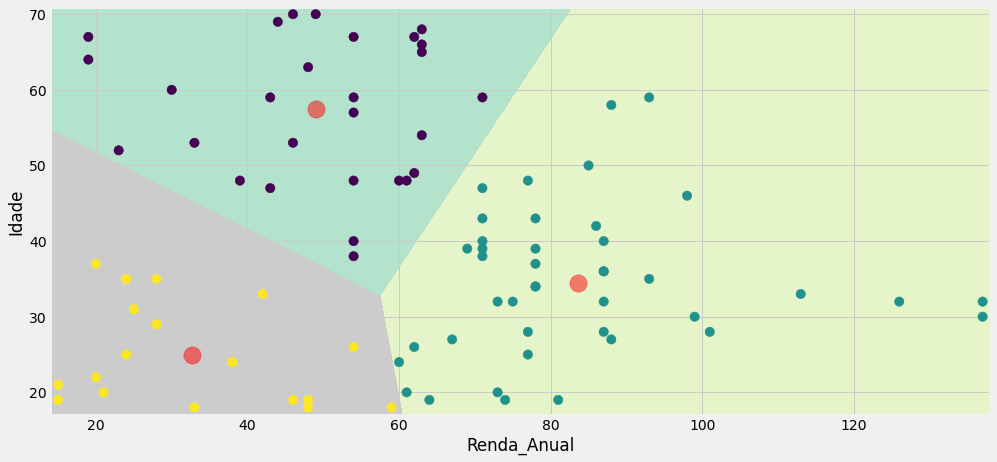

In [ ]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X3)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Renda_Anual' ,y = 'Idade' , data = df_masc , c = labels2 , s = 88 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Idade') , plt.xlabel('Renda_Anual')
plt.show()

###Vamos criar uma coluna no nosso Data Set para diferenciar cada observação tipo de cluster


In [ ]:
df_masc["clusters"] = algorithm.labels_
df_masc.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
14,15,Male,37,20,13,2


>> Agora é possivel identificar o cluster de cada pessoa

###Vamos criar uma coluna no nosso Data Set para diferenciar cada observação tipo de cluster

In [ ]:
df_masc_grupo = df.drop(["ID"], axis = 1).groupby("clusters")
df_masc_grupo.describe()

Idade                              ... Score_(1-100)                   
         count       mean        std   min  ...           25%   50%    75%   max
clusters                                    ...                                 
0         35.0  41.114286  11.341676  19.0  ...          10.0  16.0  23.50  39.0
1         22.0  25.272727   5.257030  18.0  ...          73.0  77.0  85.75  99.0
2         81.0  42.716049  16.447822  18.0  ...          44.0  50.0  55.00  61.0
3         39.0  32.692308   3.728650  27.0  ...          74.5  83.0  90.00  97.0
4         23.0  45.217391  13.228607  19.0  ...           9.5  17.0  33.50  40.0

[5 rows x 24 columns]

>>Logo, podemos observar as medidas mais importantes de cada Cluster entre as variaveis Renda Anual, Pontuação de gastos e Idade em um Data Set de clientes Homens.

#6)Analise de Cluster (K-Means) do gênero feminino

In [ ]:
#Banco de dados dos clientes mulheres
df_feme = df.loc[df["Sexo"]== "Female"] 
df_feme.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100),clusters
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
5,6,Female,22,17,76,1
6,7,Female,35,18,6,4


In [ ]:
print(df_feme.shape)

(112, 6)


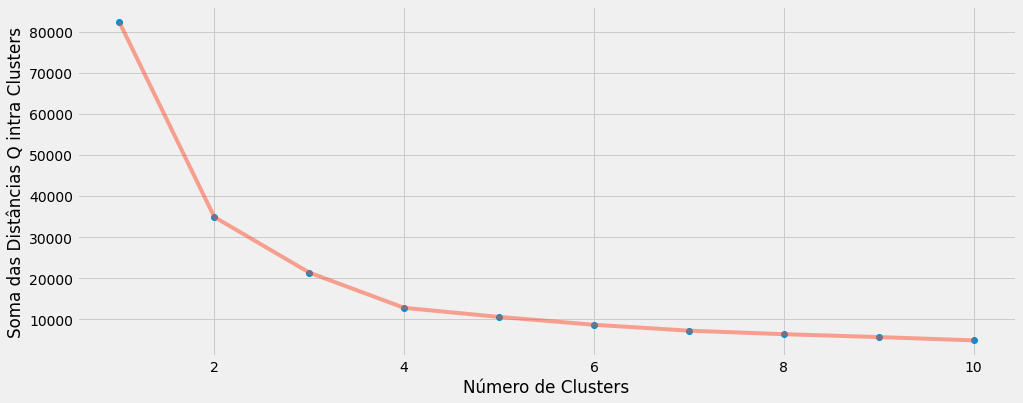

In [ ]:
X4 = df_feme[['Score_(1-100)' , 'Idade']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

>> Assumimos que o nosso nº de Clusters ideal é igual a 3.

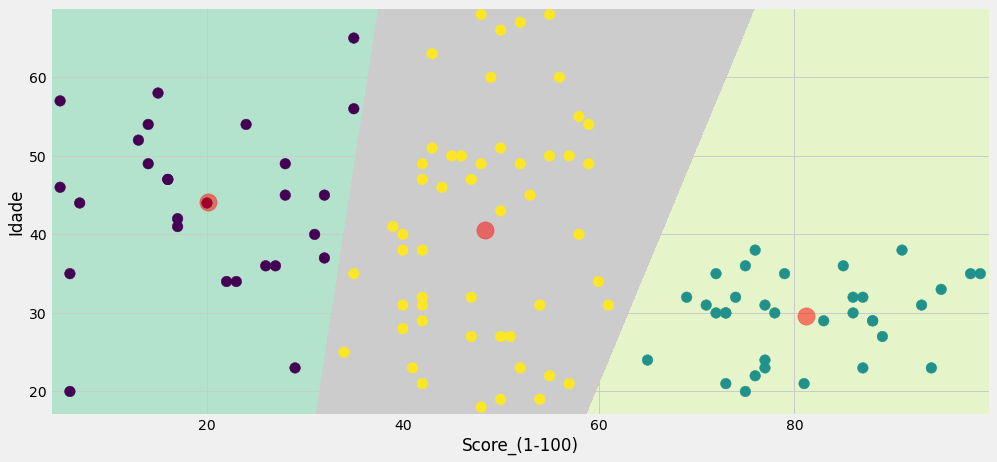

In [ ]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X4)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Score_(1-100)' ,y = 'Idade' , data = df_feme , c = labels2 , s = 112 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Idade') , plt.xlabel('Score_(1-100)')
plt.show()

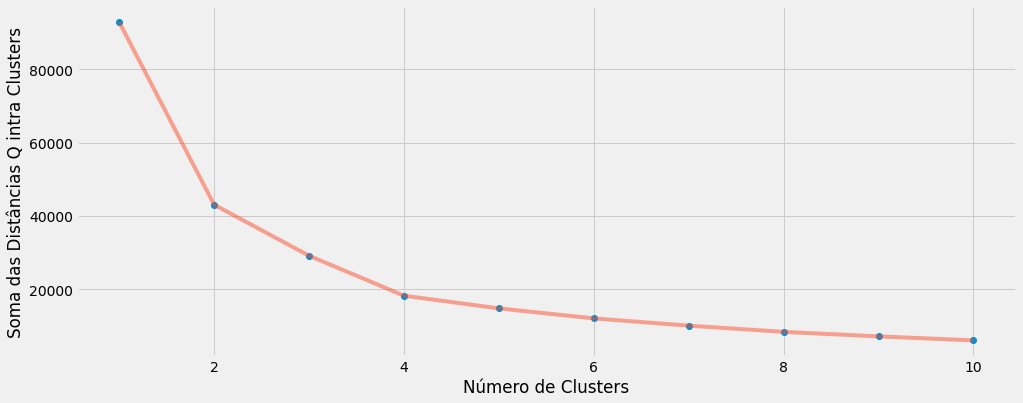

In [ ]:
X4 = df_feme[['Renda_Anual' , 'Idade']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

>> Assumimos que o nosso nº de Clusters ideal é igual a 3.

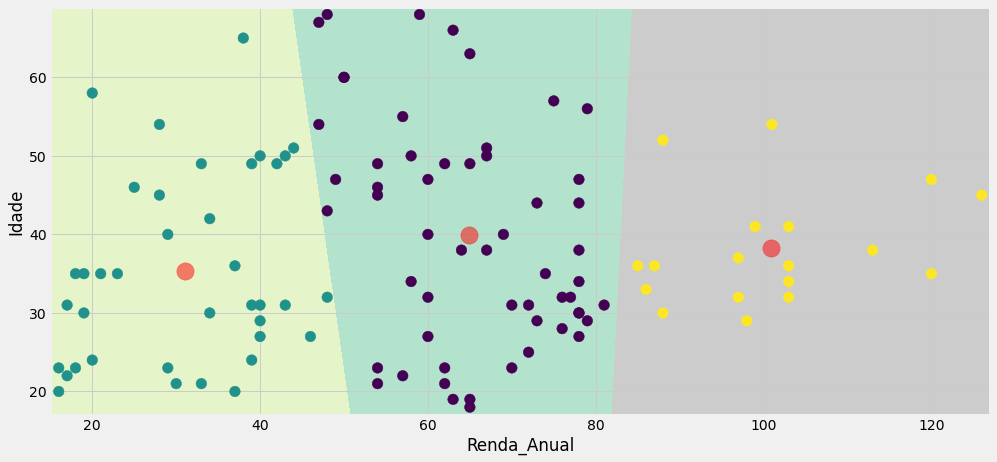

In [ ]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X4)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Renda_Anual' ,y = 'Idade' , data = df_feme , c = labels2 , s = 112 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Idade') , plt.xlabel('Renda_Anual')
plt.show()

###Vamos criar uma coluna no nosso Data Set para diferenciar cada observação tipo de cluster


In [ ]:
df_feme["clusters"] = algorithm.labels_
df_feme.head()

,ID,Sexo,Idade,Renda_Anual,Score_(1-100),clusters
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1


>> Agora é possivel identificar o cluster de cada pessoa

###Vamos criar uma coluna no nosso Data Set para diferenciar cada observação tipo de cluster

In [ ]:
df_feme_grupo = df.drop(["ID"], axis = 1).groupby("clusters")
df_feme_grupo.describe()

Idade                              ... Score_(1-100)                   
         count       mean        std   min  ...           25%   50%    75%   max
clusters                                    ...                                 
0         35.0  41.114286  11.341676  19.0  ...          10.0  16.0  23.50  39.0
1         22.0  25.272727   5.257030  18.0  ...          73.0  77.0  85.75  99.0
2         81.0  42.716049  16.447822  18.0  ...          44.0  50.0  55.00  61.0
3         39.0  32.692308   3.728650  27.0  ...          74.5  83.0  90.00  97.0
4         23.0  45.217391  13.228607  19.0  ...           9.5  17.0  33.50  40.0

[5 rows x 24 columns]

>>Logo, podemos observar as medidas mais importantes de cada Cluster entre as variaveis Renda Anual, Pontuação de gastos e Idade em um Data Set de clientes Homens.

#7)Programa Final

###Aqui vamos deixar um prototipo para o direcionamento de Pushs adequados para diferentes tipos de clientes, levando em consideração as analises realizadas.
---  

In [ ]:
def Push(Data_Set):
  df = Data_Set
  for i in range(len(df)):
    if df.loc[i, "clusters"] == 0 :
      print("")
    elif df.loc[i, "clusters"] == 1 :
      print("Esse desconto é válido apenas até amanhã")
    elif df.loc[i, "clusters"] == 2 :
      print("Olha só, não conte para ninguém, mas eu vou te dar um desconto. Você ganhou R$ 10,00 de bônus em sua compra!")
    elif df.loc[i, "clusters"] == 3 :
      print("Nosso produto é exclusivo e apenas algumas unidades estão disponìveis")
    else :
      print("")
  return ("Push's enviados")



>> Com este programa os clientes da AME Digital vão recebr Push's personalizados de acordo com o seu padrão de vida, então eles vão dar mais atenção ao app e consequentemente traram mais retorno financeiro para a AME. 